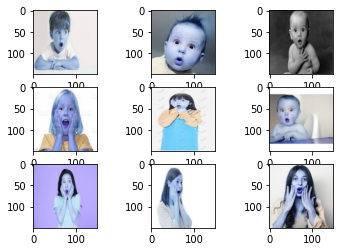

(80, 4)

In [1]:
from sklearn.utils import shuffle
from keras.models import Sequential
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
import math as m
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam, RMSprop
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,Flatten
from tensorflow.keras.utils import to_categorical 
from keras.layers.pooling import MaxPooling2D
from keras.layers import Conv2D
from tensorflow.keras.optimizers import SGD
import cv2
import pickle
import sklearn

with open('Nhandiencamxuc.pickle', 'rb') as f:
  (x_train, y_train), (x_test, y_test) = pickle.load(f)
x_1 = x_train
x_2 = x_test

for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(x_train[i], cmap = plt.get_cmap('gray'))
plt.show()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = to_categorical(y_train,4)
y_test = to_categorical(y_test,4)
y_train.shape

In [2]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape = (150,150,3,)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

In [3]:
opt=SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train,y_train, epochs=15, verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 12s 179ms/step - loss: 2.0533 - accuracy: 0.2000
Epoch 2/15
3/3 [==============================] - 0s 36ms/step - loss: 2.8708 - accuracy: 0.2500
Epoch 3/15
3/3 [==============================] - 0s 36ms/step - loss: 1.4237 - accuracy: 0.2500
Epoch 4/15
3/3 [==============================] - 0s 37ms/step - loss: 1.3743 - accuracy: 0.2750
Epoch 5/15
3/3 [==============================] - 0s 36ms/step - loss: 1.3781 - accuracy: 0.2625
Epoch 6/15
3/3 [==============================] - 0s 35ms/step - loss: 1.3780 - accuracy: 0.2750
Epoch 7/15
3/3 [==============================] - 0s 35ms/step - loss: 1.3752 - accuracy: 0.3000
Epoch 8/15
3/3 [==============================] - 0s 35ms/step - loss: 1.3721 - accuracy: 0.2750
Epoch 9/15
3/3 [==============================] - 0s 34ms/step - loss: 1.3671 - accuracy: 0.3000
Epoch 10/15
3/3 [==============================] - 0s 36ms/step - loss: 1.3561 - accuracy: 0.3250
Epoch 11/15
3/3 [==========

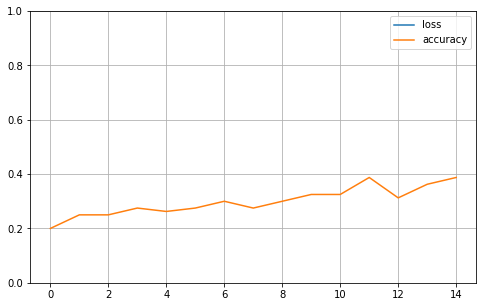

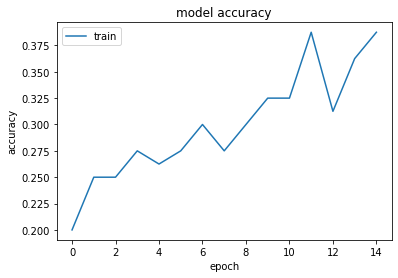

In [5]:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

(150, 150, 3)
[2]


'Dự đoán là Giận dữ'

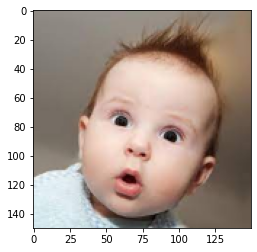

In [8]:
test = 1
plt.imshow(cv2.cvtColor(x_1[test], cv2.COLOR_BGR2RGB))
print(x_1[test].shape)
img = x_1[test].reshape(1,150,150,3)
img = img.astype('float32')
img /= 255
pred = np.argmax(model.predict(img), axis = 1)
print(pred)
Label = ['Dự đoán là Ngạc Nhiên', 'Dự đoán là Hạnh Phúc', 'Dự đoán là Giận dữ','Dự đoán là Sợ Hãi']
Label[pred[0]]

(150, 150, 3)
[3]


'Dự đoán là Sợ Hãi'

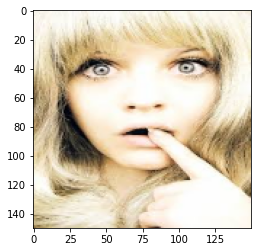

In [9]:
test = 16
plt.imshow(cv2.cvtColor(x_1[test], cv2.COLOR_BGR2RGB))
print(x_1[test].shape)
img = x_1[test].reshape(1,150,150,3)
img = img.astype('float32')
img /= 255
pred = np.argmax(model.predict(img), axis = 1)
print(pred)
Label = ['Dự đoán là Ngạc Nhiên', 'Dự đoán là Hạnh Phúc', 'Dự đoán là Giận dữ','Dự đoán là Sợ Hãi']
Label[pred[0]]

(150, 150, 3)
[3]


'Dự đoán là Sợ Hãi'

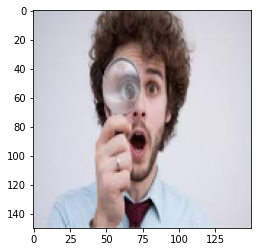

In [10]:
test = 19
plt.imshow(cv2.cvtColor(x_1[test], cv2.COLOR_BGR2RGB))
print(x_1[test].shape)
img = x_1[test].reshape(1,150,150,3)
img = img.astype('float32')
img /= 255
pred = np.argmax(model.predict(img), axis = 1)
print(pred)
Label = ['Dự đoán là Ngạc Nhiên', 'Dự đoán là Hạnh Phúc', 'Dự đoán là Giận dữ','Dự đoán là Sợ Hãi']
Label[pred[0]]

(150, 150, 3)
[3]


'Dự đoán là Sợ Hãi'

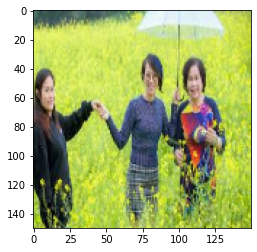

In [11]:
test = 30
plt.imshow(cv2.cvtColor(x_1[test], cv2.COLOR_BGR2RGB))
print(x_1[test].shape)
img = x_1[test].reshape(1,150,150,3)
img = img.astype('float32')
img /= 255
pred = np.argmax(model.predict(img), axis = 1)
print(pred)
Label = ['Dự đoán là Ngạc Nhiên', 'Dự đoán là Hạnh Phúc', 'Dự đoán là Giận dữ','Dự đoán là Sợ Hãi']
Label[pred[0]]

# Mục mới